# Part 2 Data Visualization Ords_prods_all

----

#  Task 1 Import libraries and dfs

#  Task 2 Reading Exercises

# Task 3 Anaysis for order_hour_of_day

# Task 4 Creating a bar chart for loyatly_flag column

# Task 5 check expenditures for prices column

# Task 6 Exploratory Analysis connection b/t age and family status

# Task 7  Create a scatter plot for Task 6

# Task 8 Export Visuals

# Task 9 Export Dataset

------------

#  Task 1 Import libraries and dfs

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#pathway to datasets
path =(r'C:\Users\colmu\Desktop\Career Foundry\Achievement 4\Instacart Basket Analysis')

In [3]:
#Importing dataset
ords_prods=pd.read_pickle(os.path.join(path, 'data','Prepared Data','orders_products_all.pkl'))

In [4]:
#supressing scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [37]:
ords_prods.head(3)

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,price_range_loc,busiest_period_of_day,busiest_days,loyalty_flag,spending_flag,FRQ_prior_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,Mid-range product,least orders,regularly busy days,New customer,Low spender,Non-frequent customer
1,2398795,1,2,3,7,15.00,196,1,1,Soda,...,2/17/2019,3,married,40423,Mid-range product,least orders,least busy days,New customer,Low spender,Non-frequent customer
2,473747,1,3,3,12,21.00,196,1,1,Soda,...,2/17/2019,3,married,40423,Mid-range product,most orders,least busy days,New customer,Low spender,Non-frequent customer


------------

#  Task 2 Reading Exercises

## Bar Charts

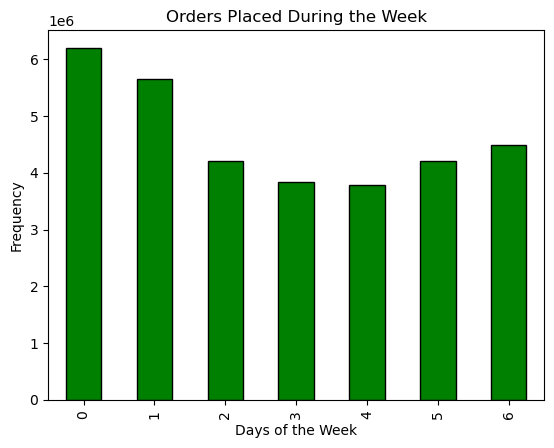

In [40]:
#creating Bar object
Total_orders_over_week = ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar(title='Orders Placed During the Week', xlabel='Days of the Week', ylabel='Frequency', color='green', edgecolor='black')

plt.savefig('Total_orders_over_week.png')
plt.show()

### Outliers Removal

In [6]:
#checking outliers
ords_prods.loc[ords_prods['prices'] >= 100]

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,price_range_loc,busiest_period_of_day,busiest_days,loyalty_flag,spending_flag,FRQ_prior_order_flag


In [ ]:
# consistency check
df_high = df_high[['order_id','prices']]

df_high

In [9]:
#turning values over $100 into NaN 
ords_prods.loc[ords_prods['prices'] >100, 'prices'] = np.nan

In [10]:
ords_prods['prices'].max()

25.0

### Histograms

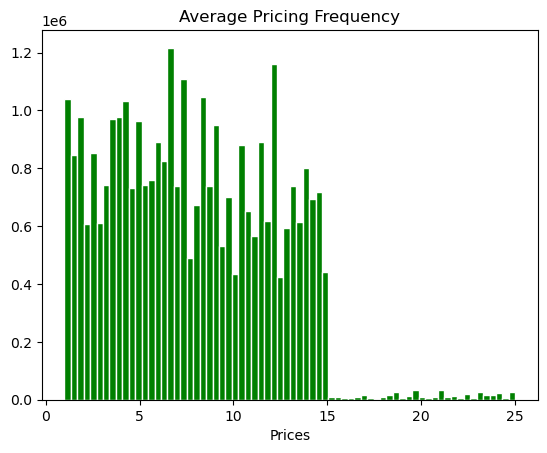

In [9]:
# creating histogram object
hist=ords_prods['prices'].plot.hist(title='Average Pricing Frequency', xlabel='Prices', ylabel='', color='green', edgecolor='white',bins = 70)

In [7]:
ords_prods['prices'].describe()

count   32399732.00
mean           7.79
std            4.24
min            1.00
25%            4.20
50%            7.40
75%           11.30
max           25.00
Name: prices, dtype: float64

### Scatterplots

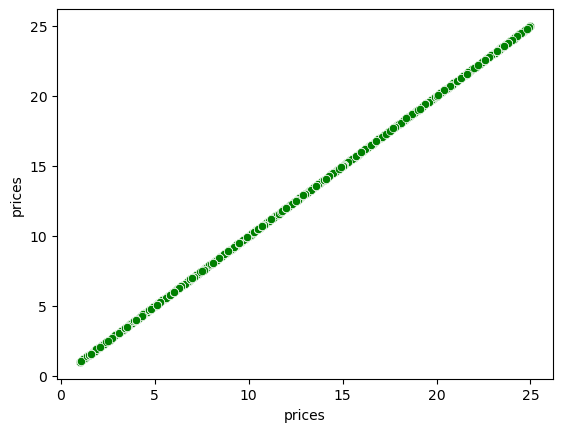

In [76]:
#Creating scatterplot object
scatter=sns.scatterplot(data=ords_prods, x = 'prices', y = 'prices', color='green')

## Line Charts

### Sampling Data 

In [4]:
#creating 70/30 split for random seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.7

In [5]:
# store 70% of the sample in the df big
big = ords_prods[dev]

In [6]:
#store 30% of the sample in the df small
small = ords_prods[~dev]

In [81]:
#quality check
len(ords_prods)

32404859

In [82]:
len(big)+len(small)

32404859

In [7]:
#further reducing the sample size
df_2 = small[['orders_day_of_week','prices']]

### Creating the Linechart

C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

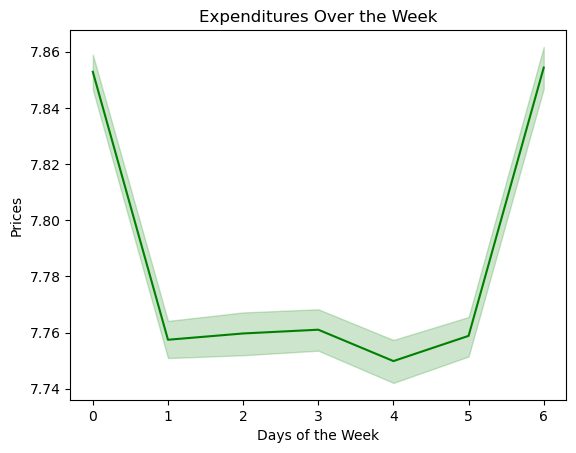

In [8]:
#creating line chart for Expenditures_Over_the week
Expenditures_Over_the_week = sns.lineplot(data = df_2, x='orders_day_of_week', y = 'prices', color='green').set(title='Expenditures Over the Week', xlabel='Days of the Week',  ylabel = 'Prices')
plt.savefig('Expenditures_Over_the week.png')
plt.show()

### Exporting Files

In [10]:
#saving Histogram
hist.figure.savefig(r'C:\Users\colmu\Desktop\Career Foundry\Achievement 4\Instacart Basket Analysis\Analysis\Visualizations\hist_Pricing_Freq.png')

In [88]:
#saving scatterplot
scatter.figure.savefig(r'C:\Users\colmu\Desktop\Career Foundry\Achievement 4\Instacart Basket Analysis\Analysis\Visualizations\scatterplot_Freq.png')

------------

# Task 3 Anaysis for order_hour_of_day

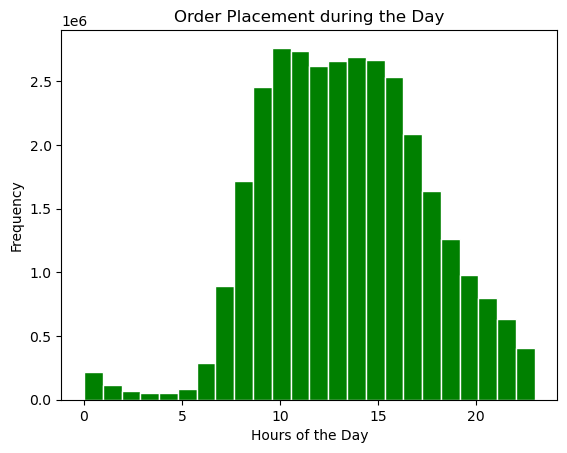

In [89]:
# creating histogram object
hist2=ords_prods['order_hour_of_day'].plot.hist(title='Order Placement during the Day',  xlabel ='Hours of the Day', color='green',edgecolor='white',bins = 24)

#####  This histogram shows that the majority of the orders placed are during the late morning to mid afternoon. There is a sharp decline in orders placed from midnight until 7am.

# Task 4 Creating a bar chart for loyatly_flag column

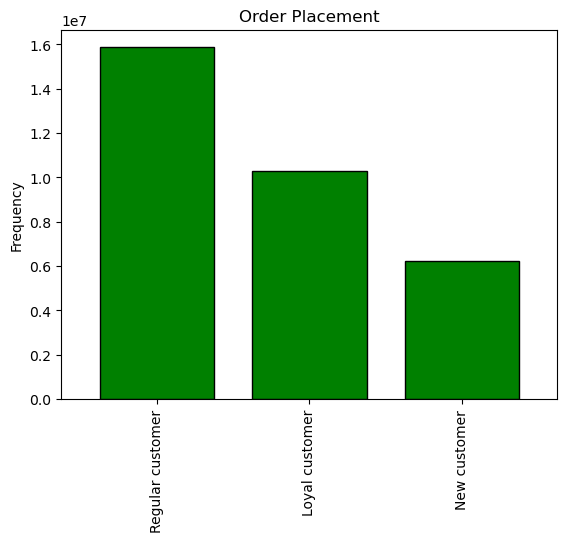

In [90]:
#creating Bar object for loyaty_flag
bar2 = ords_prods['loyalty_flag'].value_counts().plot.bar(title='Order Placement', xlabel='', ylabel='Frequency', color='green', edgecolor='black', width=.75)

# Task 5 check expenditures for prices column

### Sampling Data 

In [11]:
#creating 70/30 split for random seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.7

In [12]:
# store 70% of the sample in the df big
big2 = ords_prods[dev]

In [13]:
#store 30% of the sample in the df small
small2 = ords_prods[~dev]

In [14]:
#quality check
len(ords_prods)

32404859

In [15]:
len(big2)+len(small2)

32404859

In [16]:
#further reducing the sample size
df_3 = small2[['prices','order_hour_of_day']]

### Creating Line graph

C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\colmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

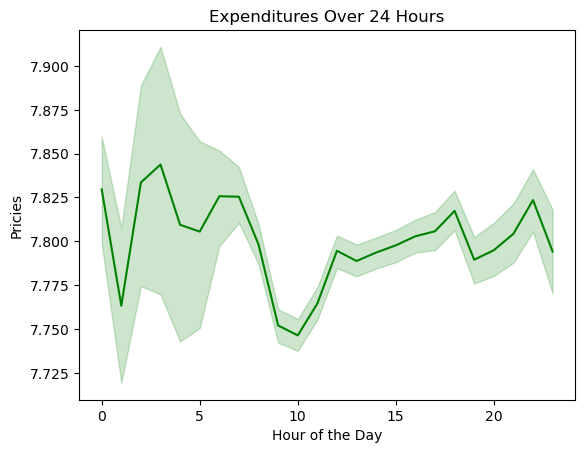

In [18]:
#creating line chart and Saving it as PNG
Expenditures_Over_24_Hours = sns.lineplot(data= df_3, x='order_hour_of_day', y='prices', color='green').set(title='Expenditures Over 24 Hours', xlabel = 'Hour of the Day',  ylabel = 'Pricies')
plt.savefig('Expenditures_Over_24_Hours.png')
plt.show()

# Task 6 Exploratory Analysis connection b/t age and family status

In [98]:
#sub-setting small2 for prices and order_hour_of_day
df_4 = small2[['n_dependants','Age']]

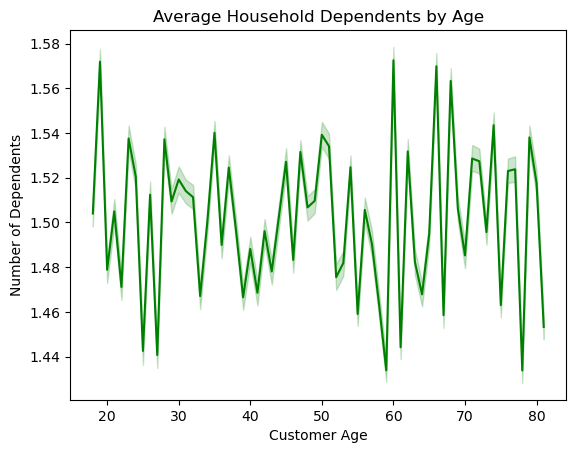

In [129]:
#creating line chart for age and family status with small sample and saving it as PNG
Average_Household_Dependents_by_Age = sns.lineplot(data = df_4, x='Age', y='n_dependants', color='green').set(title='Average Household Dependents by Age',xlabel = 'Customer Age', ylabel = 'Number of Dependents')
plt.savefig('Average_Household_Dependents_by_Age.png', format='png')
plt.show()

####

# Task 7  Create a scatter plot for Task 6

In [136]:
len(small2)

9721056

In [131]:
#sub-setting small2 for age and spending power
df_5 = small2[['income','Age']]

In [135]:
len(big2)

22683803

In [133]:
#sub-setting big2 for age and spending power
df_6 = big2[['income','Age']]

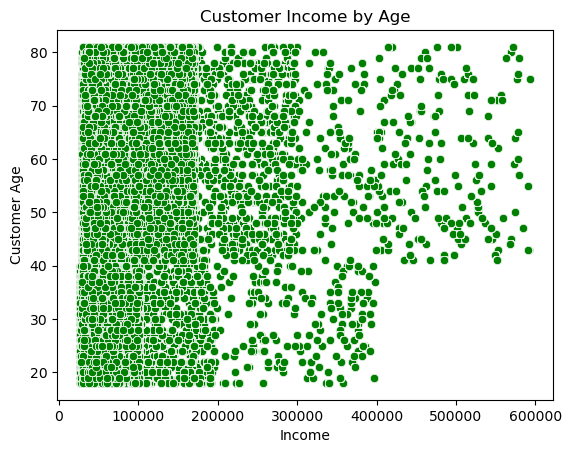

In [137]:
#creating scatterplot for age and income and saving it as PNG
Customer_Income_by_Age = sns.scatterplot(data = df_6, x='income', y='Age', color='green').set(title='Customer Income by Age',xlabel = 'Income', ylabel = 'Customer Age')
plt.savefig('Customer_Income_by_Age.png', format='png')
plt.show()

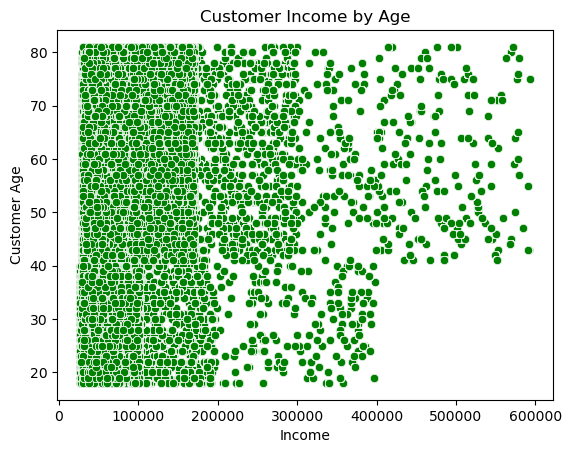

In [134]:
#creating scatterplot for age and income  using 70% sample and saving it as PNG
Customer_Income_by_Age = sns.scatterplot(data = df_6, x='income', y='Age', color='green').set(title='Customer Income by Age',xlabel = 'Income', ylabel = 'Customer Age')
plt.savefig('Customer_Income_by_Age.png', format='png')
plt.show()

##### I compared both the 30% and 70% scatterplots against eachother since my CPU had the ability to process both to confirm vaidity between samples. What the scatterplots indicate is that the majority of IC customers make below 200,000 regardless of age. Customers making more than this become more densly populated at age 40 or above compared to customers under age 40. Currently IC does not have a cusotmer base of those under 40 years og age reporting more than 400,000 in income a year.

# 8 Export Visuals

In [100]:
#saving Histogram
hist2.figure.savefig(r'C:\Users\colmu\Desktop\Career Foundry\Achievement 4\Instacart Basket Analysis\Analysis\Visualizations\hist_ordersoftheday_Freq.png')

In [101]:
#saving Barchart
bar2.figure.savefig(r'C:\Users\colmu\Desktop\Career Foundry\Achievement 4\Instacart Basket Analysis\Analysis\Visualizations\orderfrequency.png')

##### Line charts were saved in their respective cells using plt.savefigure(). This was a work aorund due to error cost 'list' object has no figure

# 9 Export Dataset

In [8]:
ords_prods.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_all.pkl'))